   Income  Experience  Age    City   Salary LoanApproved
0   30000           1   22    Pune  21770.0           No
1   45000           2   24  Mumbai  25860.0           No
2   50000           3   36    Pune  34890.0           No
3   60000           5   30   Delhi  43691.0          Yes
4   70000           7   35  Mumbai  53234.0          Yes
Regression Shapes:: (16, 4) (4, 4)
                               MAE           MSE        R2
LinearRegression       4316.218126  2.264615e+07  0.853305
DecisionTreeRegressor  3260.000000  1.411380e+07  0.908575
RandomForestRegressor  3364.262500  1.376861e+07  0.910811

Best Regression Model: RandomForestRegressor
MAE: 3364.2625000000007
MSE: 13768612.344875012
R2: 0.9108111789202183


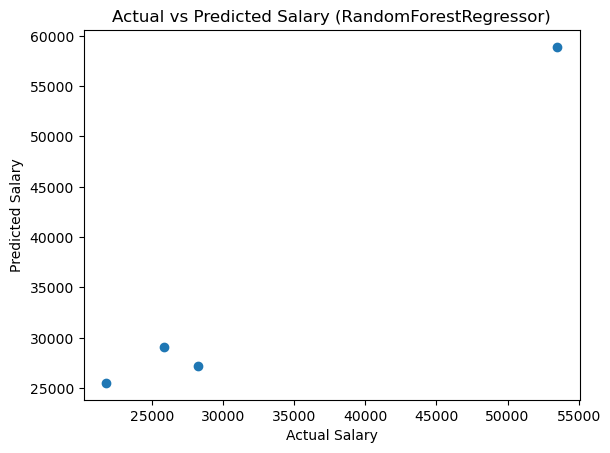

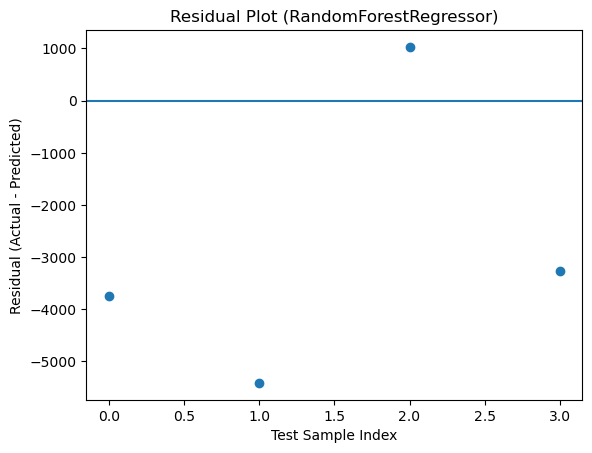

Classification shapes: (16, 4) (4, 4)
                        Accuracy
LogisticRegression          0.75
DecisionTreeClassifier      0.25
RandomForestClassifier      0.50
KNN                         0.75

Best Classifier: LogisticRegression
Accuracy: 0.75
Confusion Matrix:
 [[2 0]
 [1 1]]

Classification Report:

              precision    recall  f1-score   support

          No       0.67      1.00      0.80         2
         Yes       1.00      0.50      0.67         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4



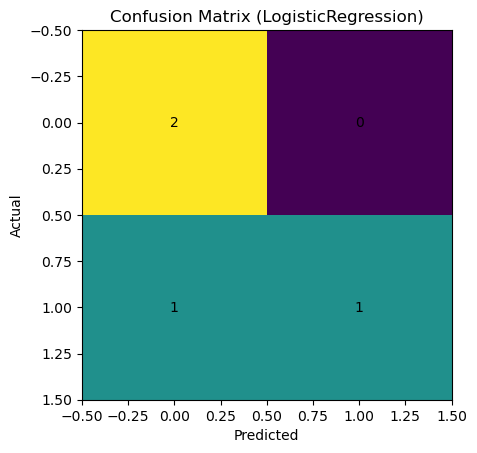

=== Regression Models Summary ===
                               MAE           MSE        R2
LinearRegression       4316.218126  2.264615e+07  0.853305
DecisionTreeRegressor  3260.000000  1.411380e+07  0.908575
RandomForestRegressor  3364.262500  1.376861e+07  0.910811

=== Classification Models Summary (Accuracy only) ===
                        Accuracy
LogisticRegression          0.75
DecisionTreeClassifier      0.25
RandomForestClassifier      0.50
KNN                         0.75


In [53]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder,StandardScaler,LabelEncoder 
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline 
from sklearn.linear_model import LinearRegression, LogisticRegression 
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split

from sklearn.metrics import (
    mean_absolute_error, mean_squared_error, r2_score,
    confusion_matrix, accuracy_score, classification_report
)

import matplotlib.pyplot as plt
data={
    "Income":[30000,45000,50000,60000,70000,80000,55000,40000,90000,65000,52000,48000,75000,82000,35000,42000,68000,73000,62000,58000],
    "Experience":[1,2,3,5,7,10,4,2,12,6,3,4,8,9,1,2,7,9,5,4],
    "Age":[22,24,36,30,35,40,28,23,45,32,27,29,37,42,21,23,34,39,31,28],
    "City":["Pune","Mumbai","Pune","Delhi","Mumbai","Delhi","Pune","Pune","Delhi","Mumbai","Pune", "Delhi", "Mumbai", "Pune", "Pune",
             "Mumbai", "Delhi", "Mumbai", "Pune", "Delhi"]
}
df=pd.DataFrame(data)
np.random.seed(42)
df["Salary"]=df["Income"]*0.6+df["Experience"]*1500+np.random.randint(-5000,5000,size=len(df))
loan_approved=[]
for i,row in df.iterrows():
    if (row["Income"]>55000) and (row["Experience"]>=3) and (row["Age"]>=25):
        loan_approved.append("Yes" if np.random.rand()>0.1 else "No")
    else:
        loan_approved.append("No" if np.random.rand() > 0.2 else "Yes")
df["LoanApproved"]=loan_approved
print(df.head())
numeric_features=["Income","Experience","Age"]
categorical_features=["City"]
numeric_transformer=StandardScaler()
categorical_transformer=OneHotEncoder(handle_unknown="ignore")
preprocessor =ColumnTransformer(
    transformers=[
        ("num",numeric_transformer,numeric_features),
        ("Cat",categorical_transformer,categorical_features),
    ]
)
le_loan=LabelEncoder()
df["LoanApproved_encoded"]= le_loan.fit_transform(df["LoanApproved"])
X_reg = df[numeric_features + categorical_features]
y_reg = df["Salary"]
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)
print("Regression Shapes::",X_reg_train.shape,X_reg_test.shape)
models_reg={
    "LinearRegression":LinearRegression(),
    "DecisionTreeRegressor":DecisionTreeRegressor(random_state=42),
    "RandomForestRegressor":RandomForestRegressor(random_state=42,n_estimators=100),
    
}
result_reg={}
for name, model in models_reg.items():
    pipe = Pipeline(steps=[
        ("preprocess", preprocessor),
        ("model", model)
    ])
    pipe.fit(X_reg_train, y_reg_train)
    y_reg_pred = pipe.predict(X_reg_test)
    mae = mean_absolute_error(y_reg_test, y_reg_pred)
    mse = mean_squared_error(y_reg_test, y_reg_pred)
    r2 = r2_score(y_reg_test, y_reg_pred)
    results_reg[name] = {"MAE": mae, "MSE": mse, "R2": r2}
print(pd.DataFrame(results_reg).T)
best_reg_name = max(results_reg, key=lambda m: results_reg[m]["R2"])
best_reg_model = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", models_reg[best_reg_name])
])
best_reg_model.fit(X_reg_train, y_reg_train)
y_reg_pred_best = best_reg_model.predict(X_reg_test)
print("\nBest Regression Model:", best_reg_name)
print("MAE:", mean_absolute_error(y_reg_test, y_reg_pred_best))
print("MSE:", mean_squared_error(y_reg_test, y_reg_pred_best))
print("R2:", r2_score(y_reg_test, y_reg_pred_best))
plt.figure()
plt.scatter(y_reg_test,y_reg_pred_best)
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title(f"Actual vs Predicted Salary ({best_reg_name})")
plt.show()
residuals = y_reg_test - y_reg_pred_best
plt.figure()
plt.scatter(range(len(residuals)), residuals)
plt.axhline(0)
plt.xlabel("Test Sample Index")
plt.ylabel("Residual (Actual - Predicted)")
plt.title(f"Residual Plot ({best_reg_name})")
plt.show()
X_clf = df[numeric_features + categorical_features]
y_clf = df["LoanApproved_encoded"]  # 0/1
X_clf_train, X_clf_test, y_clf_train, y_clf_test = train_test_split(
    X_clf, y_clf, test_size=0.2, random_state=42
)
print("Classification shapes:", X_clf_train.shape, X_clf_test.shape)
models_clf = {
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "DecisionTreeClassifier": DecisionTreeClassifier(random_state=42),
    "RandomForestClassifier": RandomForestClassifier(random_state=42, n_estimators=100),
    "KNN": KNeighborsClassifier(n_neighbors=3),
}
results_clf = {}
for name, model in models_clf.items():
    pipe = Pipeline(steps=[
        ("preprocess", preprocessor),
        ("model", model)
    ])
    pipe.fit(X_clf_train, y_clf_train)
    y_clf_pred = pipe.predict(X_clf_test)
    acc = accuracy_score(y_clf_test, y_clf_pred)
    cm = confusion_matrix(y_clf_test, y_clf_pred)
    results_clf[name] = {
        "Accuracy": acc,
        "ConfusionMatrix": cm
    }
print(pd.DataFrame({m: {"Accuracy": results_clf[m]["Accuracy"]} for m in results_clf}).T)
best_clf_name = max(results_clf, key=lambda m: results_clf[m]["Accuracy"])
best_clf_model = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", models_clf[best_clf_name])
])
best_clf_model.fit(X_clf_train, y_clf_train)
y_clf_pred_best = best_clf_model.predict(X_clf_test)
print("\nBest Classifier:", best_clf_name)
print("Accuracy:", accuracy_score(y_clf_test, y_clf_pred_best))
print("Confusion Matrix:\n", confusion_matrix(y_clf_test, y_clf_pred_best))
print("\nClassification Report:\n")
print(classification_report(y_clf_test, y_clf_pred_best, target_names=le_loan.classes_))
cm = confusion_matrix(y_clf_test, y_clf_pred_best)
plt.figure()
plt.imshow(cm)
plt.title(f"Confusion Matrix ({best_clf_name})") 
plt.xlabel("Predicted") 
plt.ylabel("Actual")
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha="center", va="center")  
plt.show()

# Summary tables
print("=== Regression Models Summary ===") 
print(pd.DataFrame(results_reg).T) 

print("\n=== Classification Models Summary (Accuracy only) ===") 
print(pd.DataFrame({m: {"Accuracy": results_clf[m]["Accuracy"]}
                    for m in results_clf}).T)
 

